## In this kernel we convert LEVEL5 Lyft data (NuScenes format) to KITTI format, which is usually used in public repositories. After this you can search for repos, that solve KITTI 3d-detection task.

In [1]:
!pip install -qqq -U git+https://github.com/stalkermustang/nuscenes-devkit.git

Command "/home/jionie/py3env/bin/python3.6 /home/jionie/py3env/lib/python3.6/site-packages/pip install --ignore-installed --no-user --prefix /tmp/pip-build-env-ytx3ep_h/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools>=40.8.0 wheel" failed with error code 1 in None


In [2]:
from pathlib import Path
from PIL import Image

In [3]:
# dir with all input data from Kaggle
INP_DIR = Path('../input/3d-object-detection-for-autonomous-vehicles/')

In [4]:
# dir with index json tables (scenes, categories, logs, etc...)
TABLES_DIR = INP_DIR.joinpath('train_data')

In [5]:
# Adjust the dataroot parameter below to point to your local dataset path.
# The correct dataset path contains at least the following four folders (or similar): images, lidar, maps
!ln -s {INP_DIR}/train_images images
!ln -s {INP_DIR}/train_maps maps
!ln -s {INP_DIR}/train_lidar lidar

In [6]:
DATA_DIR = Path().absolute() 
# Empty init equals '.'.
# We use this because we link train dirs to current dir (cell above)

In [7]:
# dir to write KITTY-style dataset
STORE_DIR = DATA_DIR.joinpath('kitti_format')

In [8]:
!python -m lyft_dataset_sdk.utils.export_kitti nuscenes_gt_to_kitti -h

/home/jionie/py3env/bin/python: No module named lyft_dataset_sdk.utils.export_kitti


In [9]:
# convertation to KITTY-format
!python -m lyft_dataset_sdk.utils.export_kitti nuscenes_gt_to_kitti \
        --lyft_dataroot {DATA_DIR} \
        --table_folder {TABLES_DIR} \
        --samples_count 20 \
        --parallel_n_jobs 2 \
        --get_all_detections True \
        --store_dir {STORE_DIR}

9 category,
18 attribute,
4 visibility,
18421 instance,
10 sensor,
148 calibrated_sensor,
177789 ego_pose,
180 log,
180 scene,
22680 sample,
189504 sample_data,
638179 sample_annotation,
1 map,
Done loading in 13.8 seconds.
Reverse indexing ...
Done reverse indexing in 5.8 seconds.
100%|███████████████████████████████████████████| 20/20 [00:03<00:00,  5.35it/s]


In [10]:
# check created (converted) files. velodyne = LiDAR poinclouds data (in binary)
!ls {STORE_DIR}/velodyne | head -2

01020d574daf59a525650f57aa19abb64d84de794ab528bb6428211922797387.bin
02e02fb754b503c83ec0d9455168733c62397b42a50ec36206a5cb8f84d88e1f.bin


In [11]:
# render converted data for check. Currently don't support multithreading :(
!python -m lyft_dataset_sdk.utils.export_kitti render_kitti \
        --store_dir {STORE_DIR}

Rendering 3d boxes projected from 3d KITTI format
100%|███████████████████████████████████████████| 20/20 [01:13<00:00,  3.68s/it]


In [12]:
# Script above write images to 'render' folder
# in store_dir (where we have converted dataset)
RENDER_DIR = STORE_DIR.joinpath('render')

In [13]:
# get all rendered files
all_renders = list(RENDER_DIR.glob('*'))
all_renders.sort()

In [14]:
# render radar data (bird view) and camera data with bboxes

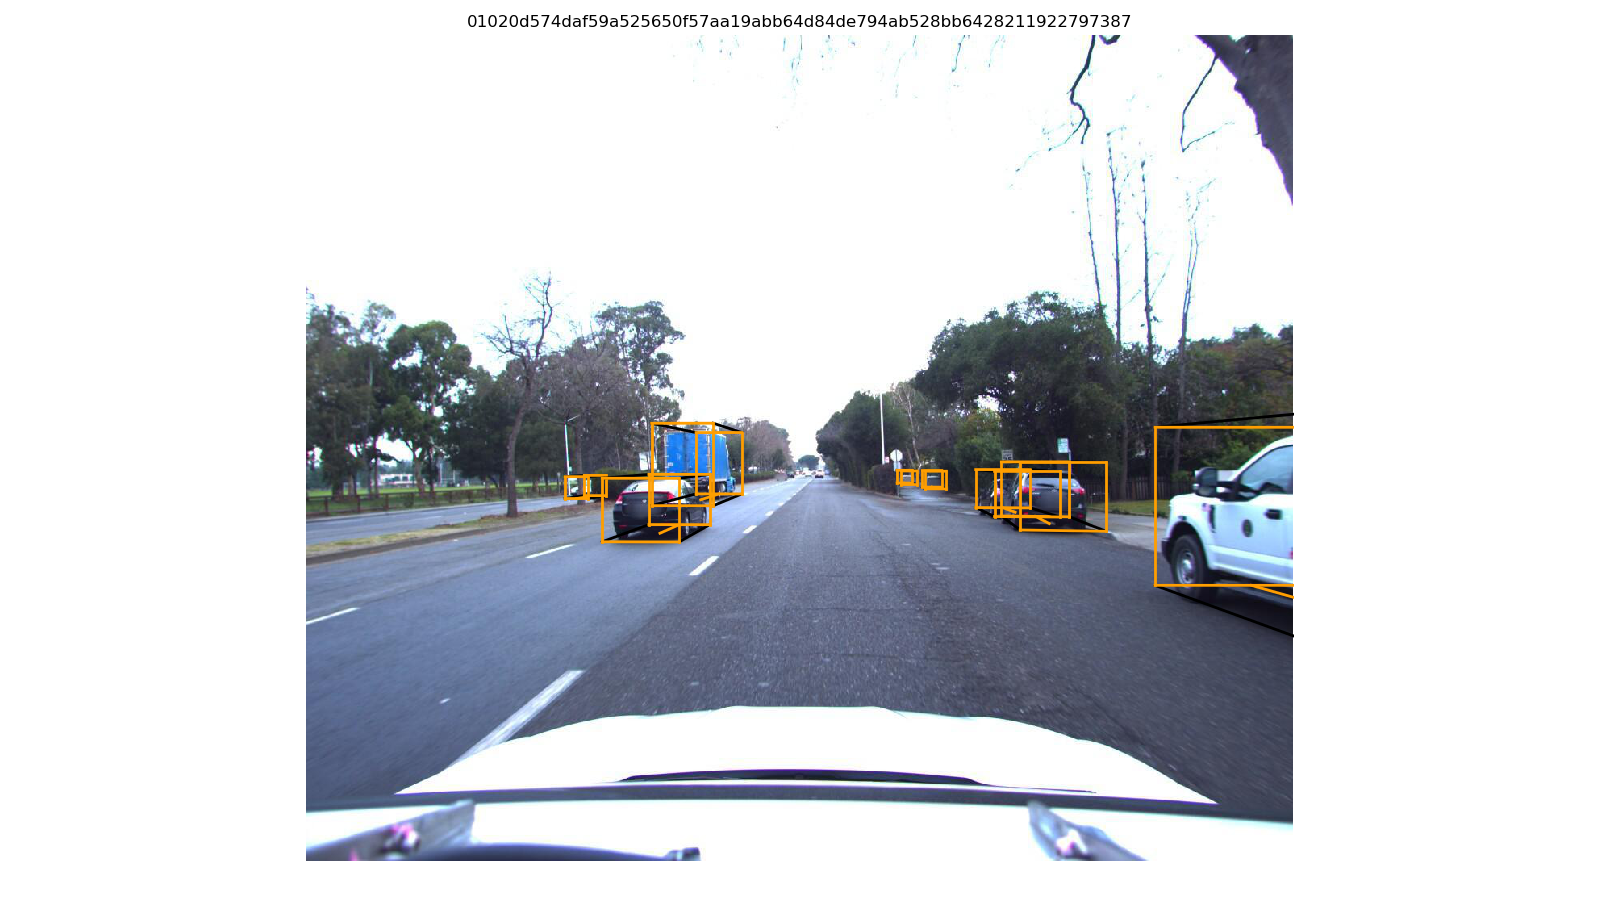

In [15]:
Image.open(all_renders[0])

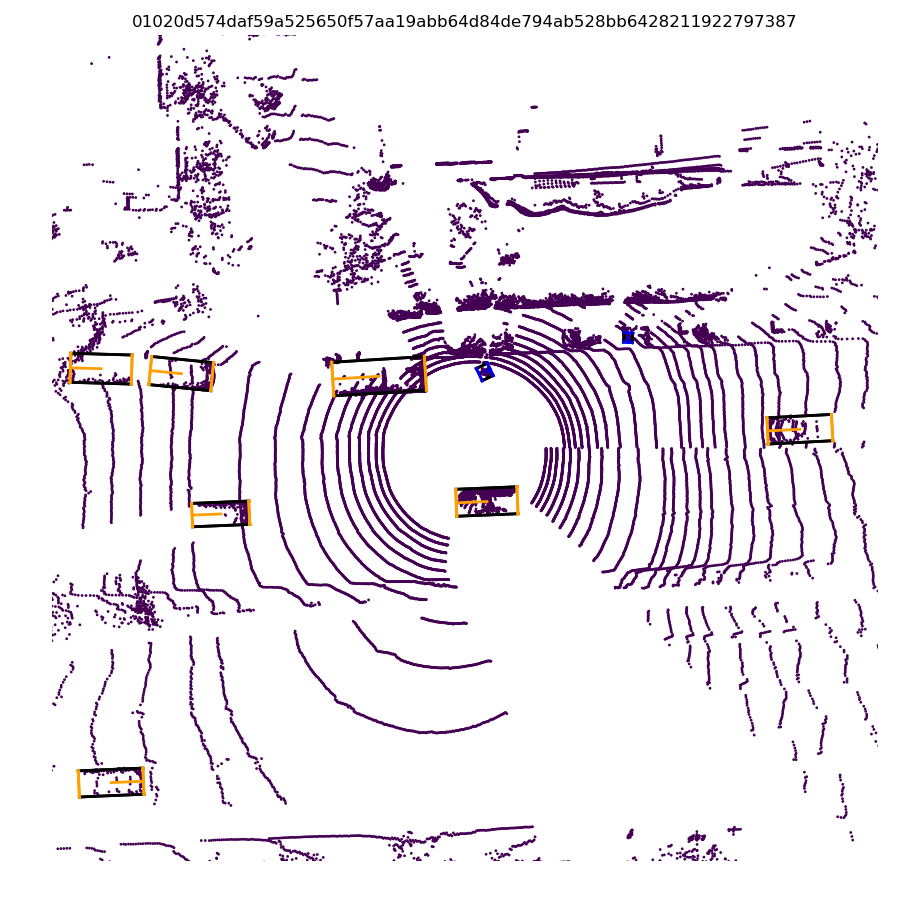

In [16]:
Image.open(all_renders[1])

## I'm use rendering only for check success converting. 

## Can be used to visualize NN predictions for test lyft set (visual metric estimation :D)

In [17]:
!rm -rf {STORE_DIR}